In [2]:
import os

import gym
import numpy as np
import matplotlib.pyplot as plt

from stable_baselines.bench import Monitor
from stable_baselines.common.vec_env import DummyVecEnv, VecNormalize
from stable_baselines.common.policies import MlpPolicy, FeedForwardPolicy
from stable_baselines import results_plotter
from stable_baselines import *

/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [9]:
import gym
import numpy as np

# Create log dir
log_dir = "tmp/"
os.makedirs(log_dir, exist_ok=True)

# Customize value network 
class CustomPolicy(FeedForwardPolicy):
    def __init__(self, *args, **kwargs):
        super(CustomPolicy, self).__init__(*args, **kwargs,
                                           net_arch=[dict(vf=[10, 7, 5])],
                                           feature_extraction="mlp")
        
# Create and wrap the environment
env = gym.make('Taxi-v3')
env = Monitor(env, log_dir, allow_early_resets=True)
env = DummyVecEnv(([lambda: env]))

model = TRPO(CustomPolicy, env, verbose=1)

# Train the agent
time_steps = 100000
model.learn(total_timesteps=time_steps)

********** Iteration 0 ************
Optimizing Policy...
sampling
done in 0.333 seconds
computegrad
done in 0.126 seconds
conjugate_gradient
      iter residual norm  soln norm
         0    0.00394          0
         1    0.00102      0.448
         2   2.99e-05       2.21
         3    9.6e-07       2.31
         4   2.24e-06       2.31
         5   1.72e-08       2.32
         6   3.12e-10       2.32
         7   5.33e-10       2.32
         8   4.76e-12       2.32
done in 0.122 seconds
Expected: 0.042 Actual: 0.042
Stepsize OK!
vf
done in 0.093 seconds
------------------------------------------
| EpLenMean               | 200          |
| EpRewMean               | -774         |
| EpThisIter              | 5            |
| EpisodesSoFar           | 5            |
| TimeElapsed             | 0.762        |
| TimestepsSoFar          | 1024         |
| entloss                 | 0.0          |
| entropy                 | 1.7878038    |
| explained_variance_t... | -0.000222    |
| mean

Stepsize OK!
vf
done in 0.050 seconds
------------------------------------------
| EpLenMean               | 199          |
| EpRewMean               | -637         |
| EpThisIter              | 5            |
| EpisodesSoFar           | 35           |
| TimeElapsed             | 3.31         |
| TimestepsSoFar          | 7168         |
| entloss                 | 0.0          |
| entropy                 | 1.6947262    |
| explained_variance_t... | -1.16e-05    |
| meankl                  | 0.0038685645 |
| optimgain               | 0.039133817  |
| surrgain                | 0.039133817  |
------------------------------------------
********** Iteration 7 ************
Optimizing Policy...
sampling
done in 0.286 seconds
computegrad
done in 0.019 seconds
conjugate_gradient
      iter residual norm  soln norm
         0    0.00325          0
         1    0.00122      0.635
         2    0.00156       1.02
         3   0.000304       2.24
         4   8.76e-05       2.33
         5   9.87e

********** Iteration 13 ************
Optimizing Policy...
sampling
done in 0.284 seconds
computegrad
done in 0.020 seconds
conjugate_gradient
      iter residual norm  soln norm
         0    0.00178          0
         1    0.00221      0.457
         2   0.000383       1.43
         3   4.14e-05       2.03
         4   3.32e-05       2.04
         5   2.35e-06       2.11
         6   5.09e-06       2.11
         7   2.04e-07       2.11
         8   7.94e-09       2.12
         9   3.07e-10       2.12
        10   2.02e-10       2.12
done in 0.045 seconds
Expected: 0.037 Actual: 0.036
Stepsize OK!
vf
done in 0.048 seconds
------------------------------------------
| EpLenMean               | 200          |
| EpRewMean               | -385         |
| EpThisIter              | 5            |
| EpisodesSoFar           | 71           |
| TimeElapsed             | 6.31         |
| TimestepsSoFar          | 14336        |
| entloss                 | 0.0          |
| entropy                

Stepsize OK!
vf
done in 0.049 seconds
------------------------------------------
| EpLenMean               | 200          |
| EpRewMean               | -245         |
| EpThisIter              | 5            |
| EpisodesSoFar           | 102          |
| TimeElapsed             | 8.86         |
| TimestepsSoFar          | 20480        |
| entloss                 | 0.0          |
| entropy                 | 1.4257009    |
| explained_variance_t... | 0.00137      |
| meankl                  | 0.0027600108 |
| optimgain               | 0.033111375  |
| surrgain                | 0.033111375  |
------------------------------------------
********** Iteration 20 ************
Optimizing Policy...
sampling
done in 0.280 seconds
computegrad
done in 0.019 seconds
conjugate_gradient
      iter residual norm  soln norm
         0     0.0015          0
         1    0.00218      0.415
         2   0.000114       2.21
         3   0.000125       2.25
         4   1.58e-05       2.39
         5   6.85

********** Iteration 26 ************
Optimizing Policy...
sampling
done in 0.285 seconds
computegrad
done in 0.019 seconds
conjugate_gradient
      iter residual norm  soln norm
         0    0.00349          0
         1    0.00111      0.301
         2     0.0028       1.73
         3   3.33e-05       2.23
         4   9.72e-05       2.26
         5   9.57e-07       2.33
         6   3.79e-08       2.33
         7   9.94e-10       2.33
         8   6.91e-10       2.33
         9   2.76e-11       2.33
done in 0.036 seconds
Expected: 0.040 Actual: 0.040
Stepsize OK!
vf
done in 0.050 seconds
------------------------------------------
| EpLenMean               | 200          |
| EpRewMean               | -213         |
| EpThisIter              | 5            |
| EpisodesSoFar           | 138          |
| TimeElapsed             | 11.8         |
| TimestepsSoFar          | 27648        |
| entloss                 | 0.0          |
| entropy                 | 1.3803158    |
| explained_var

Stepsize OK!
vf
done in 0.049 seconds
------------------------------------------
| EpLenMean               | 200          |
| EpRewMean               | -206         |
| EpThisIter              | 6            |
| EpisodesSoFar           | 169          |
| TimeElapsed             | 14.4         |
| TimestepsSoFar          | 33792        |
| entloss                 | 0.0          |
| entropy                 | 1.3585815    |
| explained_variance_t... | 0.00312      |
| meankl                  | 0.0023967987 |
| optimgain               | 0.03440365   |
| surrgain                | 0.03440365   |
------------------------------------------
********** Iteration 33 ************
Optimizing Policy...
sampling
done in 0.283 seconds
computegrad
done in 0.020 seconds
conjugate_gradient
      iter residual norm  soln norm
         0    0.00113          0
         1    0.00109      0.283
         2    0.00011        1.6
         3   0.000195       1.66
         4   2.39e-05       1.81
         5   1.05

********** Iteration 39 ************
Optimizing Policy...
sampling
done in 0.283 seconds
computegrad
done in 0.020 seconds
conjugate_gradient
      iter residual norm  soln norm
         0    0.00132          0
         1    0.00132       0.25
         2   0.000461       1.64
         3    6.5e-05       1.74
         4   1.55e-05       1.89
         5   4.55e-06       1.89
         6   2.32e-07       1.91
         7   2.01e-08       1.91
         8    3.3e-08       1.91
         9   1.49e-09       1.91
        10   2.68e-10       1.91
done in 0.045 seconds
Expected: 0.032 Actual: 0.033
Stepsize OK!
vf
done in 0.048 seconds
------------------------------------------
| EpLenMean               | 200          |
| EpRewMean               | -204         |
| EpThisIter              | 5            |
| EpisodesSoFar           | 204          |
| TimeElapsed             | 17.3         |
| TimestepsSoFar          | 40960        |
| entloss                 | 0.0          |
| entropy                

Stepsize OK!
vf
done in 0.047 seconds
------------------------------------------
| EpLenMean               | 200          |
| EpRewMean               | -202         |
| EpThisIter              | 5            |
| EpisodesSoFar           | 235          |
| TimeElapsed             | 19.9         |
| TimestepsSoFar          | 47104        |
| entloss                 | 0.0          |
| entropy                 | 1.3360605    |
| explained_variance_t... | -0.000491    |
| meankl                  | 0.0026089204 |
| optimgain               | 0.033659138  |
| surrgain                | 0.033659138  |
------------------------------------------
********** Iteration 46 ************
Optimizing Policy...
sampling
done in 0.285 seconds
computegrad
done in 0.021 seconds
conjugate_gradient
      iter residual norm  soln norm
         0    0.00131          0
         1    0.00102      0.279
         2   0.000108       1.65
         3    7.2e-05       1.68
         4   4.15e-05       1.79
         5   4.83

********** Iteration 52 ************
Optimizing Policy...
sampling
done in 0.277 seconds
computegrad
done in 0.020 seconds
conjugate_gradient
      iter residual norm  soln norm
         0    0.00123          0
         1    0.00113      0.329
         2   0.000506       1.85
         3   4.22e-05       1.95
         4   6.95e-05       1.97
         5   1.89e-06       2.04
         6   1.43e-07       2.05
         7   9.81e-09       2.05
         8   9.89e-10       2.05
         9   1.14e-09       2.05
        10   1.03e-09       2.05
done in 0.046 seconds
Expected: 0.033 Actual: 0.033
Stepsize OK!
vf
done in 0.051 seconds
------------------------------------------
| EpLenMean               | 200          |
| EpRewMean               | -201         |
| EpThisIter              | 5            |
| EpisodesSoFar           | 271          |
| TimeElapsed             | 22.9         |
| TimestepsSoFar          | 54272        |
| entloss                 | 0.0          |
| entropy                

Stepsize OK!
vf
done in 0.051 seconds
-----------------------------------------
| EpLenMean               | 200         |
| EpRewMean               | -201        |
| EpThisIter              | 5           |
| EpisodesSoFar           | 302         |
| TimeElapsed             | 25.4        |
| TimestepsSoFar          | 60416       |
| entloss                 | 0.0         |
| entropy                 | 1.3176852   |
| explained_variance_t... | 0.000297    |
| meankl                  | 0.003894765 |
| optimgain               | 0.030812737 |
| surrgain                | 0.030812737 |
-----------------------------------------
********** Iteration 59 ************
Optimizing Policy...
sampling
done in 0.279 seconds
computegrad
done in 0.019 seconds
conjugate_gradient
      iter residual norm  soln norm
         0    0.00187          0
         1    0.00137      0.294
         2    0.00258       1.18
         3   5.99e-05       1.88
         4    7.4e-05        1.9
         5   2.72e-06       1.9

********** Iteration 65 ************
Optimizing Policy...
sampling
done in 0.279 seconds
computegrad
done in 0.025 seconds
conjugate_gradient
      iter residual norm  soln norm
         0    0.00157          0
         1   0.000752      0.263
         2    0.00165      0.719
         3   7.89e-05        1.5
         4   0.000126       1.55
         5   6.54e-06       1.65
         6   5.69e-07       1.68
         7   4.71e-08       1.69
         8   3.29e-08       1.69
         9   5.09e-09       1.69
        10   1.27e-09       1.69
done in 0.046 seconds
Expected: 0.029 Actual: 0.030
Stepsize OK!
vf
done in 0.051 seconds
------------------------------------------
| EpLenMean               | 200          |
| EpRewMean               | -201         |
| EpThisIter              | 6            |
| EpisodesSoFar           | 338          |
| TimeElapsed             | 28.4         |
| TimestepsSoFar          | 67584        |
| entloss                 | 0.0          |
| entropy                

Stepsize OK!
vf
done in 0.051 seconds
------------------------------------------
| EpLenMean               | 200          |
| EpRewMean               | -200         |
| EpThisIter              | 5            |
| EpisodesSoFar           | 368          |
| TimeElapsed             | 31           |
| TimestepsSoFar          | 73728        |
| entloss                 | 0.0          |
| entropy                 | 1.2816157    |
| explained_variance_t... | -0.00031     |
| meankl                  | 0.0038655347 |
| optimgain               | 0.03188069   |
| surrgain                | 0.03188069   |
------------------------------------------
********** Iteration 72 ************
Optimizing Policy...
sampling
done in 0.278 seconds
computegrad
done in 0.019 seconds
conjugate_gradient
      iter residual norm  soln norm
         0    0.00097          0
         1    0.00329      0.736
         2   0.000661       1.89
         3   0.000184       2.02
         4   0.000116       2.22
         5   8.45

********** Iteration 78 ************
Optimizing Policy...
sampling
done in 0.271 seconds
computegrad
done in 0.018 seconds
conjugate_gradient
      iter residual norm  soln norm
         0   0.000697          0
         1    0.00177      0.471
         2   0.000128       1.65
         3   2.56e-05       1.68
         4    3.4e-05       1.75
         5   1.48e-06       1.76
         6   1.52e-07       1.77
         7   8.12e-09       1.77
         8   3.71e-10       1.77
         9   1.38e-09       1.77
        10   5.28e-11       1.77
done in 0.038 seconds
Expected: 0.029 Actual: 0.029
Stepsize OK!
vf
done in 0.047 seconds
------------------------------------------
| EpLenMean               | 200          |
| EpRewMean               | -201         |
| EpThisIter              | 5            |
| EpisodesSoFar           | 404          |
| TimeElapsed             | 33.9         |
| TimestepsSoFar          | 80896        |
| entloss                 | 0.0          |
| entropy                

Stepsize OK!
vf
done in 0.050 seconds
------------------------------------------
| EpLenMean               | 200          |
| EpRewMean               | -200         |
| EpThisIter              | 5            |
| EpisodesSoFar           | 435          |
| TimeElapsed             | 36.5         |
| TimestepsSoFar          | 87040        |
| entloss                 | 0.0          |
| entropy                 | 1.3331494    |
| explained_variance_t... | -0.00049     |
| meankl                  | 0.0029307255 |
| optimgain               | 0.039093778  |
| surrgain                | 0.039093778  |
------------------------------------------
********** Iteration 85 ************
Optimizing Policy...
sampling
done in 0.284 seconds
computegrad
done in 0.020 seconds
conjugate_gradient
      iter residual norm  soln norm
         0    0.00087          0
         1    0.00136      0.344
         2   0.000138       1.76
         3   4.24e-05        1.8
         4   3.24e-05       1.88
         5   1.99

********** Iteration 91 ************
Optimizing Policy...
sampling
done in 0.266 seconds
computegrad
done in 0.018 seconds
conjugate_gradient
      iter residual norm  soln norm
         0    0.00206          0
         1   0.000943      0.272
         2   2.45e-05       2.06
         3   7.28e-05       2.09
         4   6.42e-06       2.14
         5   6.32e-07       2.14
         6   1.74e-08       2.15
         7   7.17e-10       2.15
         8      1e-09       2.15
         9   2.28e-11       2.15
done in 0.034 seconds
Expected: 0.035 Actual: 0.036
Stepsize OK!
vf
done in 0.052 seconds
------------------------------------------
| EpLenMean               | 200          |
| EpRewMean               | -200         |
| EpThisIter              | 5            |
| EpisodesSoFar           | 471          |
| TimeElapsed             | 39.3         |
| TimestepsSoFar          | 94208        |
| entloss                 | 0.0          |
| entropy                 | 1.3105001    |
| explained_var

Stepsize OK!
vf
done in 0.051 seconds
------------------------------------------
| EpLenMean               | 200          |
| EpRewMean               | -200         |
| EpThisIter              | 5            |
| EpisodesSoFar           | 501          |
| TimeElapsed             | 41.9         |
| TimestepsSoFar          | 100352       |
| entloss                 | 0.0          |
| entropy                 | 1.3073665    |
| explained_variance_t... | 2.92e-06     |
| meankl                  | 0.0030968538 |
| optimgain               | 0.031626597  |
| surrgain                | 0.031626597  |
------------------------------------------


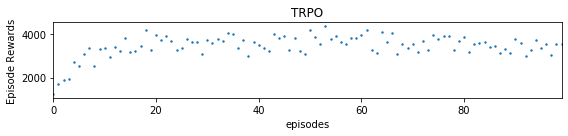

In [10]:
results_plotter.plot_results([log_dir], time_steps, results_plotter.X_EPISODES, "TRPO")
plt.show()

In [15]:
obs = env.reset()
for i in range(199):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y|